In [2]:
for i in range(10,0, -1):
    print i

10
9
8
7
6
5
4
3
2
1


input layer ahd mean 0.001045 and std 1.001966
hidden layer 1 had mean -0.000864 and std 0.523502
hidden layer 2 had mean -0.000557 and std 0.330201
hidden layer 3 had mean 0.000256 and std 0.222486
hidden layer 4 had mean 0.000144 and std 0.154072
hidden layer 5 had mean 0.000014 and std 0.107763
hidden layer 6 had mean -0.000154 and std 0.075780
hidden layer 7 had mean 0.000074 and std 0.053480
hidden layer 8 had mean -0.000089 and std 0.037791
hidden layer 9 had mean -0.000069 and std 0.026727
hidden layer 10 had mean 0.000034 and std 0.018992


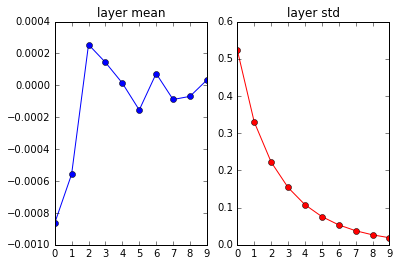

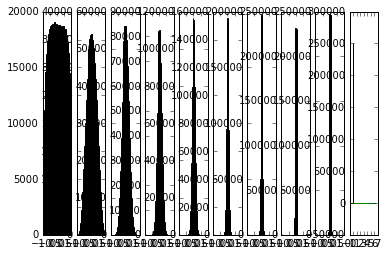

In [6]:
import numpy as np
D=np.random.randn(1000,500)
hidden_layer_sizes=[500]*10
nonlinearities=['tanh']*len(hidden_layer_sizes)

act = {'relu':lambda x:np.maximum(0,x), 'tanh':lambda x:np.tanh(x)}

Hs={}
for i in xrange(len(hidden_layer_sizes)):
    X=D if i==0 else Hs[i-1]
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    W=np.random.randn(fan_in,fan_out) / np.sqrt(2*fan_in)

    H=np.dot(X,W)
    H=act[nonlinearities[i]](H)
    Hs[i]=H

print 'input layer ahd mean %f and std %f' %(np.mean(D), np.std(D))
layer_means= [np.mean(H) for i, H in Hs.iteritems()]
layer_stds = [np.std(H) for i,H in Hs.iteritems()]

for i,H in Hs.iteritems():
    print 'hidden layer %d had mean %f and std %f' %(i+1, np.mean(H), np.std(H))

import matplotlib.pyplot as plt
plt.figure()
plt.subplot(121)
plt.plot(Hs.keys(), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(Hs.keys(), layer_stds, 'or-')
plt.title('layer std')

plt.figure()
for i,H in Hs.iteritems():
    plt.subplot(1, len(Hs), i+1)
    plt.hist(H.ravel(),30,range=(-1,1))
    
x = np.linspace(0, 2 * np.pi, 50)
plt.plot(x, np.sin(x)) # 如果没有第一个参数 x，图形的 x 坐标默认为数组的索引
plt.show() # 显示图形